### Toymodel Train Test Evaluation

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
from torch import nn
from mapsgan import cLRSolver, BicycleGenerator, ToyGenerator, ToyDiscriminator, data_loader
import mapsgan.experiments as experiments
from mapsgan.evaluation import Visualization
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


#### Set up dataloader, model, solver

In [2]:
experiment = experiments.ETH() # we store filepaths and arguments in here
dataset, trainloader = data_loader(in_len=8, out_len=12, batch_size=64, num_workers=1, path=experiment.test_dir,
                                  shuffle=True)

In [3]:
generator = BicycleGenerator(generator=ToyGenerator, start_mode='clr')
discriminator = ToyDiscriminator()

In [10]:
solver = cLRSolver(generator, discriminator, 
                loss_fns={'traj': nn.L1Loss, 'disc': nn.BCEWithLogitsLoss, 'z':nn.L1Loss},
                optims_args={'generator': {'lr': 1e-3}, 'discriminator': {'lr': 1e-3}})

In [11]:
solver.loss_weights

{'traj': 1.0, 'disc': 1.0, 'z': 1.0}

#### Training

In [12]:
solver.train(trainloader, epochs = 20, checkpoint_every=10, print_every=10, steps = {'generator': 1, 'discriminator': 1})

Training new model

       Generator Losses    Discriminator Losses
Epochs G_BCE     G_L1      D_Real    D_Fake    
20     0.648     0.846     0.641     0.735     
10     0.644     0.790     0.640     0.741     


#### Test

In [8]:
output = solver.test(trainloader)

#### Evaluation
visualization of predicted trajectories

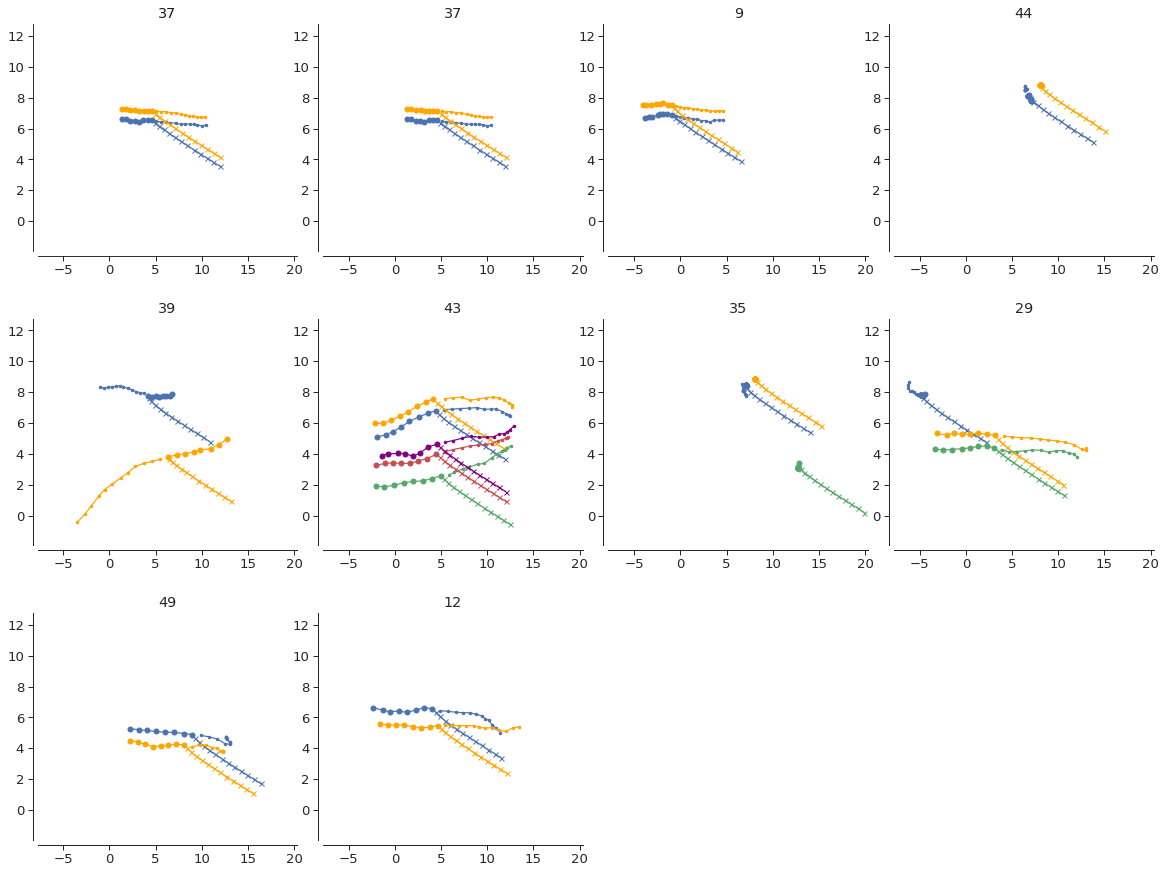

In [9]:
vis = Visualization()
ll = vis.trajectories(output, scenes=[10])